# Вариант 7.
1. Выбрать данные из файла «Семинар 9.xlsx» в соответствии со своим вариантом.
2. Выполнить кластеризацию по методу k-средних с 2, 3, 4, 5 кластерами. \
Вывести графически результаты кластеризации. \
Вывести график зависимости силуэта от числа кластеров. \
Указать, для какого числа кластеров достигается максимум силуэта.
3. Выполнить кластеризацию по методу DBSCAN. \
Вывести графически результаты кластеризации.

In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.cluster import DBSCAN, KMeans
from sklearn.metrics import silhouette_score

In [2]:
VARIANT = 7
FILENAME = "data.xlsx"

datapath = Path(FILENAME)
df = pd.read_excel(datapath, sheet_name=str(VARIANT), index_col=0)

df

,x1,x2
0,2.232079,0.010741
1,4.262275,-0.468407
2,1.844351,0.625031
3,3.736695,-0.420918
4,2.387420,-0.142476
...,...,...
395,2.450228,5.170520
396,5.335337,2.800957
397,4.338205,5.083042
398,4.985806,2.265492


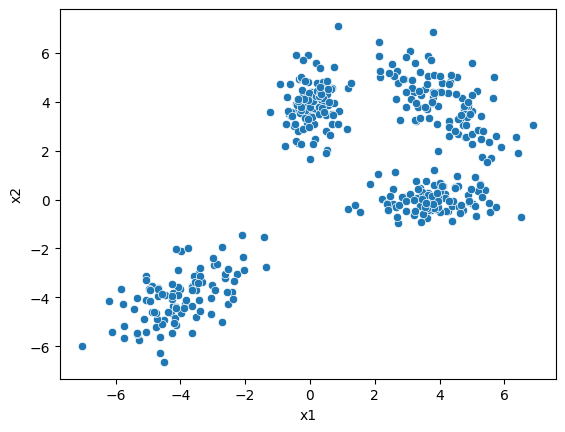

In [3]:
sns.scatterplot(x=df["x1"], y=df["x2"])
plt.show()

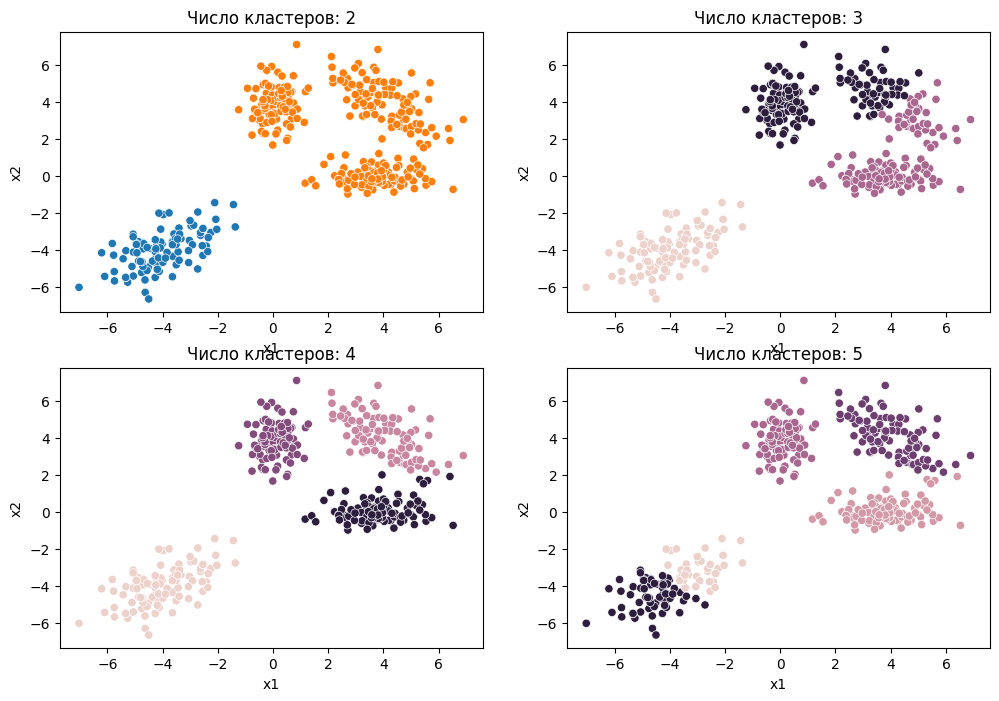

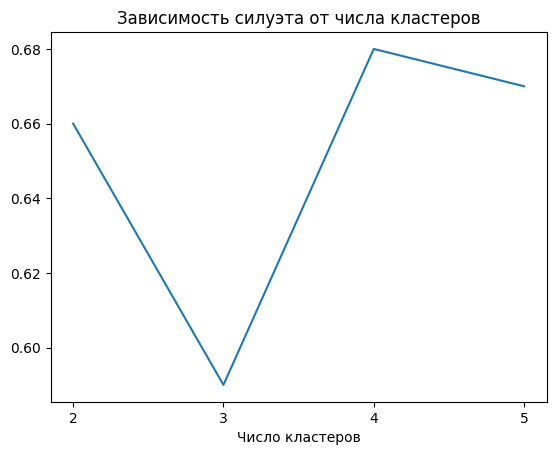

Максимум силуэта достигается при числе кластеров: 4


In [4]:
silhouette_scores = []

plt.figure(figsize=(12, 8))
for n_clusters in range(2, 6):
    kmeans = KMeans(n_clusters=n_clusters, random_state=36)
    kmeans.fit(df)
    df[f"cluster_{n_clusters}"] = kmeans.labels_

    silhouette_avg = silhouette_score(df, kmeans.labels_, random_state=42).round(2)
    silhouette_scores.append(silhouette_avg)

    plt.subplot(2, 2, n_clusters - 1)

    plt.title(f"Число кластеров: {n_clusters}")
    sns.scatterplot(x=df["x1"], y=df["x2"], hue=df[f"cluster_{n_clusters}"])
    plt.legend().remove()

plt.show()

sns.lineplot(x=range(2, 6), y=silhouette_scores)
plt.title("Зависимость силуэта от числа кластеров")
plt.xlabel("Число кластеров")
plt.xticks(range(2, 6))
plt.show()

print(
    f"Максимум силуэта достигается при числе кластеров: {silhouette_scores.index(max(silhouette_scores)) + 2}"
)

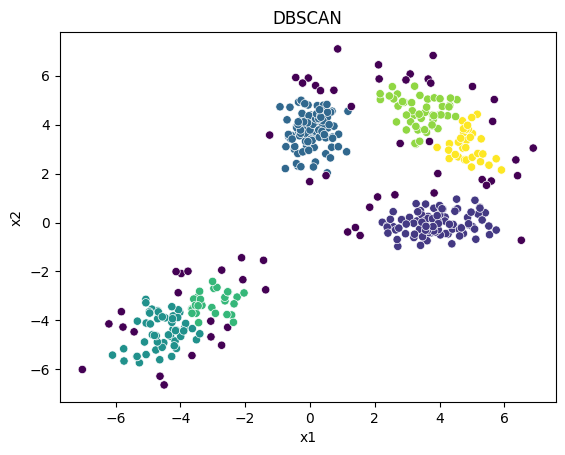

In [5]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
df["dbscan"] = dbscan.fit_predict(df)

plt.title("DBSCAN")
sns.scatterplot(x=df["x1"], y=df["x2"], hue=df["dbscan"], palette="viridis")
plt.legend().remove()
plt.show()